## Downstream Analysis of h5ad files

In [ ]:
adata_2 = sc.read_h5ad('crypt_enriched.h5ad')
adata_2

AnnData object with n_obs × n_vars = 27419 × 17573
    obs: 'Sample', 'Diet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden', '_scvi_batch', '_scvi_labels', 'published_annotations', 'EEC_refined_1', 'EEC_refined_final', 'final_annotations', 'major_cell_types'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Diet_colors', 'Sample_colors', 'final_annotations', 'final_annotations_colors', 'major_cell_types_colors', 'published_annotations_colors', 'umap'
    

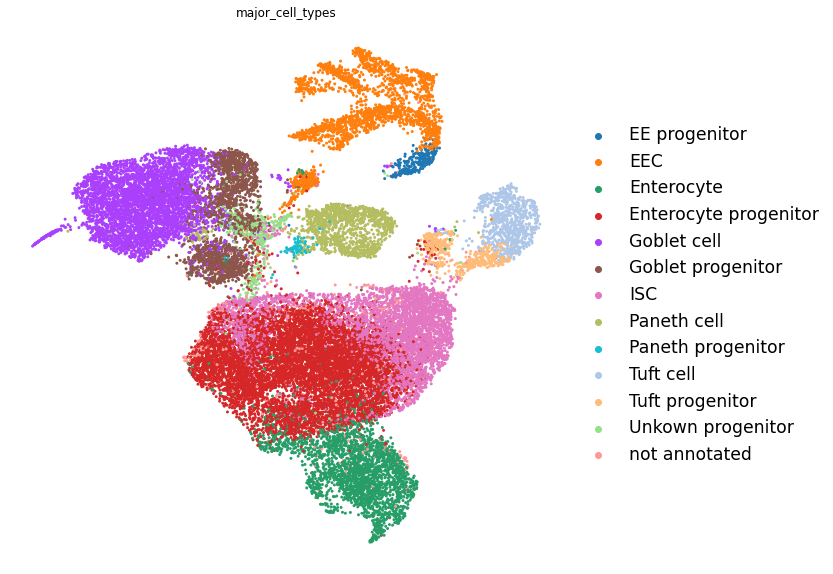

In [ ]:
# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figsize values as needed

# Plot UMAP on the specified axis
sc.pl.umap(
    adata_2,
    color=["major_cell_types"],
    frameon=False,
    size=35,
    legend_fontsize = 'xx-large',
    ax=ax
)

# Show the plot
plt.show()

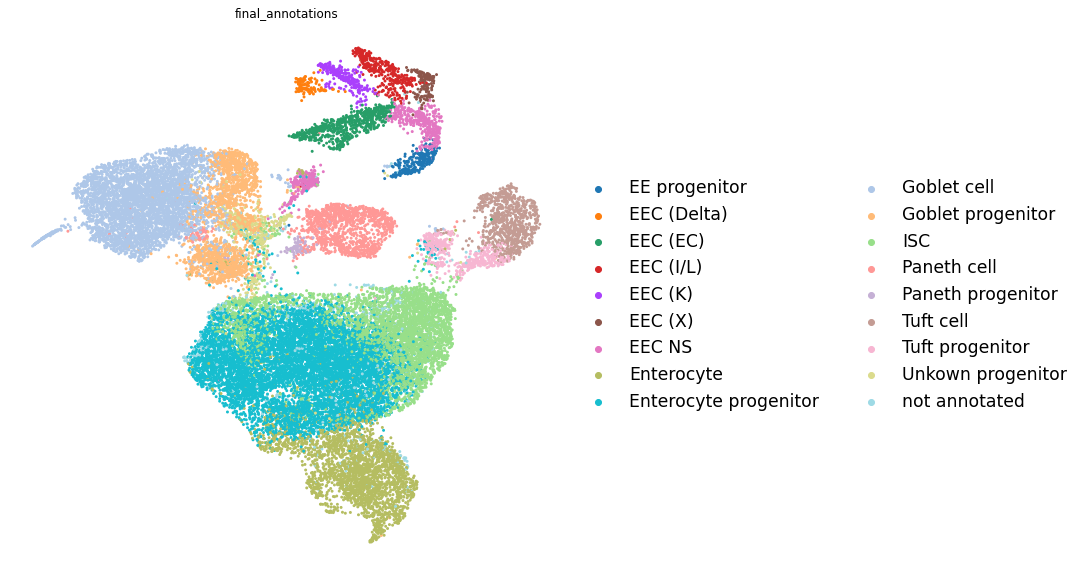

In [ ]:
# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figsize values as needed

# Plot UMAP on the specified axis
sc.pl.umap(
    adata_2,
    color=["final_annotations"],
    frameon=False,
    size=35,
    legend_fontsize = 'xx-large',
    ax=ax
)

# Show the plot
plt.show()

## Create stacked bar chart of cell counts

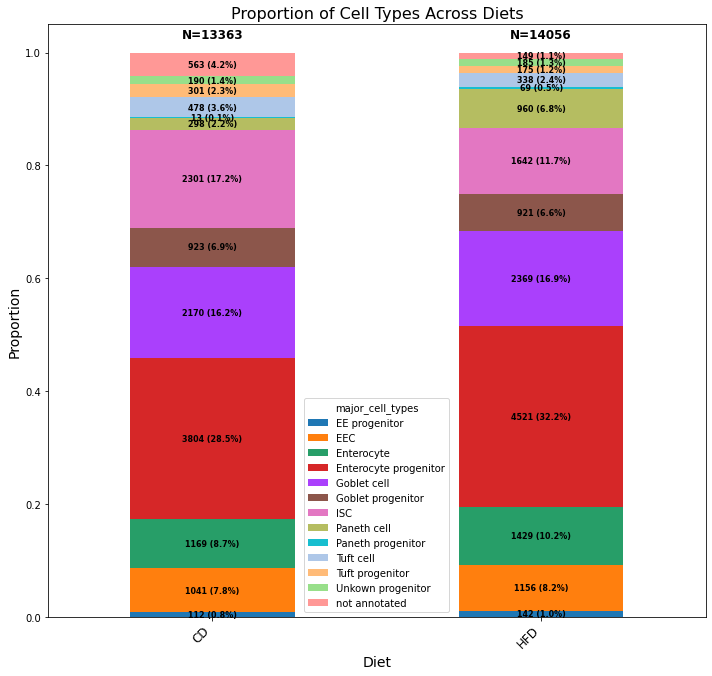

In [ ]:
# Calculate the proportions and counts of each cell type within each condition
cell_type_counts = adata_2.obs.groupby(['Diet', 'major_cell_types']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

# Sample size per condition
sample_sizes = cell_type_counts.sum(axis=1)

# Extract the predefined colors from the AnnData object
cell_type_colors = adata_2.uns['major_cell_types_colors']

# Create a color map dictionary
unique_cell_types = cell_type_counts.columns
color_map = dict(zip(unique_cell_types, cell_type_colors))

# Ensure the colors are applied in the same order as the cell types
cell_type_colors = [color_map[cell_type] for cell_type in unique_cell_types]

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each cell type as a stack with predefined colors
bars = cell_type_proportions.plot(kind='bar', stacked=True, ax=ax, color=cell_type_colors)

# Add labels and title with increased font size
ax.set_ylabel('Proportion', fontsize=14)
ax.set_xlabel('Diet', fontsize=14)
ax.set_title('Proportion of Cell Types Across Diets', fontsize=16)

# Annotate sample sizes above each bar
for i, (cond, size) in enumerate(sample_sizes.items()):
    ax.text(i, 1.02, f'N={size}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Annotate number of cells within each cell type on the bar segments
for i, (cond, row) in enumerate(cell_type_counts.iterrows()):
    cum_sum = 0
    for j, (cell_type, count) in enumerate(row.items()):
        proportion = cell_type_proportions.loc[cond, cell_type]
        if proportion > 0:
            percentage = proportion * 100
            ax.text(i, cum_sum + proportion / 2, f'{count} ({percentage:.1f}%)', ha='center', va='center', fontsize=8, color='black', weight = 'bold')
            cum_sum += proportion

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()


## Replot the EEC UMAP

/home/glennrd/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


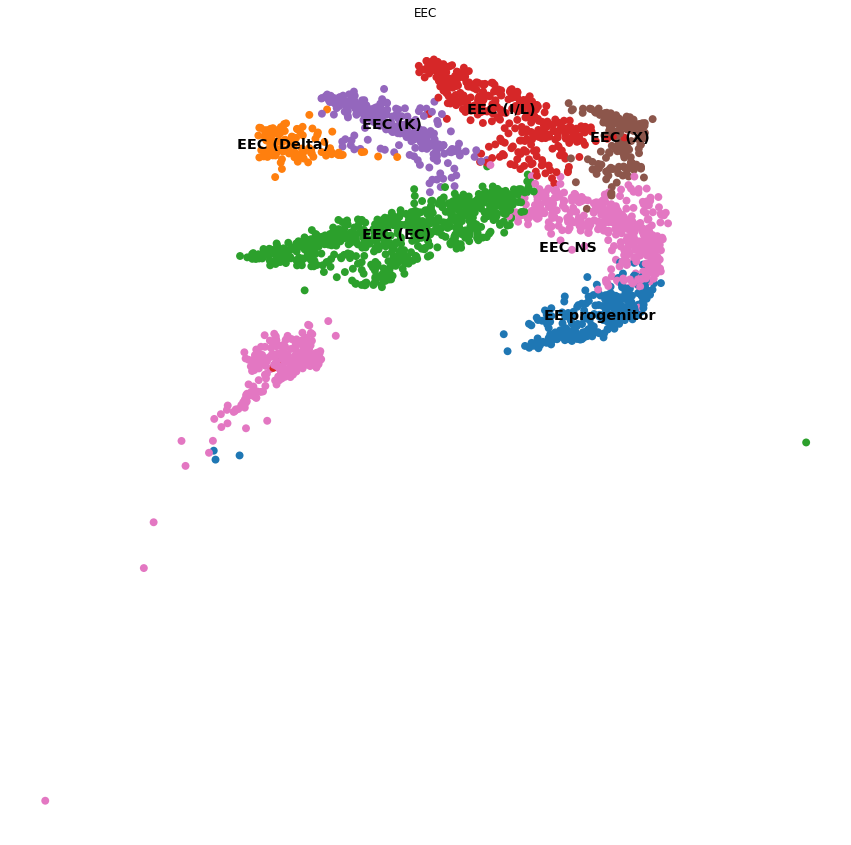

In [ ]:
# Step 1: Rename the annotation column
adata_2.obs['EEC'] = adata_2.obs['final_annotations']

# Step 2: Label any cell that doesn't begin with 'EE' as 'NA'
adata_2.obs['EEC'] = adata_2.obs['EEC'].apply(lambda x: x if x.startswith('EE') else 'NA')

# Step 3: Plot the UMAP, excluding cells labeled 'NA'
fig, ax = plt.subplots(figsize=(15, 15))  # Adjust the figsize values as needed

# Plot UMAP on the specified axis
sc.pl.umap(
    adata_2[adata_2.obs['EEC'] != 'NA'],
    color=["EEC"],
    legend_loc='on data',
    frameon=False,
    size=250,
    legend_fontsize = 'x-large',
    ax=ax
)

# Show the plot
plt.show()

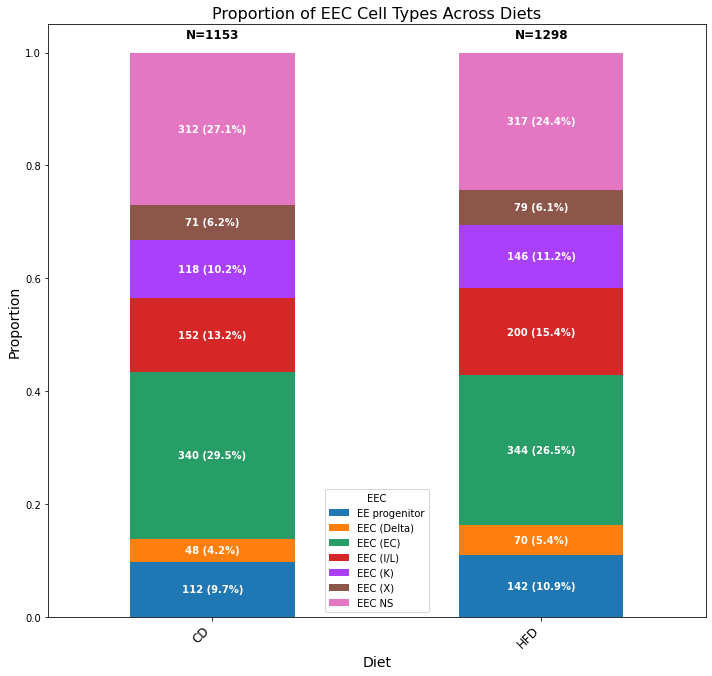

In [ ]:
# Step 4: Calculate the proportions and counts of each cell type within each condition
cell_type_counts = adata_2.obs[adata_2.obs['EEC'] != 'NA'].groupby(['Diet', 'EEC']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

# Sample size per condition
sample_sizes = cell_type_counts.sum(axis=1)

# Extract the predefined colors from the AnnData object (if available)
cell_type_colors = adata_2.uns['major_cell_types_colors']

# Create a color map dictionary
unique_cell_types = cell_type_counts.columns
color_map = dict(zip(unique_cell_types, cell_type_colors))

# Ensure the colors are applied in the same order as the cell types
cell_type_colors = [color_map[cell_type] for cell_type in unique_cell_types]

# Step 5: Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each cell type as a stack with predefined colors
bars = cell_type_proportions.plot(kind='bar', stacked=True, ax=ax, color=cell_type_colors)

# Add labels and title with increased font size
ax.set_ylabel('Proportion', fontsize=14)
ax.set_xlabel('Diet', fontsize=14)
ax.set_title('Proportion of EEC Cell Types Across Diets', fontsize=16)

# Annotate sample sizes above each bar
for i, (cond, size) in enumerate(sample_sizes.items()):
    ax.text(i, 1.02, f'N={size}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Annotate percentages within each cell type on the bar segments
for i, (cond, row) in enumerate(cell_type_counts.iterrows()):
    cum_sum = 0
    for j, (cell_type, count) in enumerate(row.items()):
        proportion = cell_type_proportions.loc[cond, cell_type]
        if proportion > 0:
            percentage = proportion * 100
            ax.text(i, cum_sum + proportion / 2, f'{count} ({percentage:.1f}%)', ha='center', va='center', fontsize=10, color='white', weight='bold')
            cum_sum += proportion

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()

## Plot UMAP based off diet

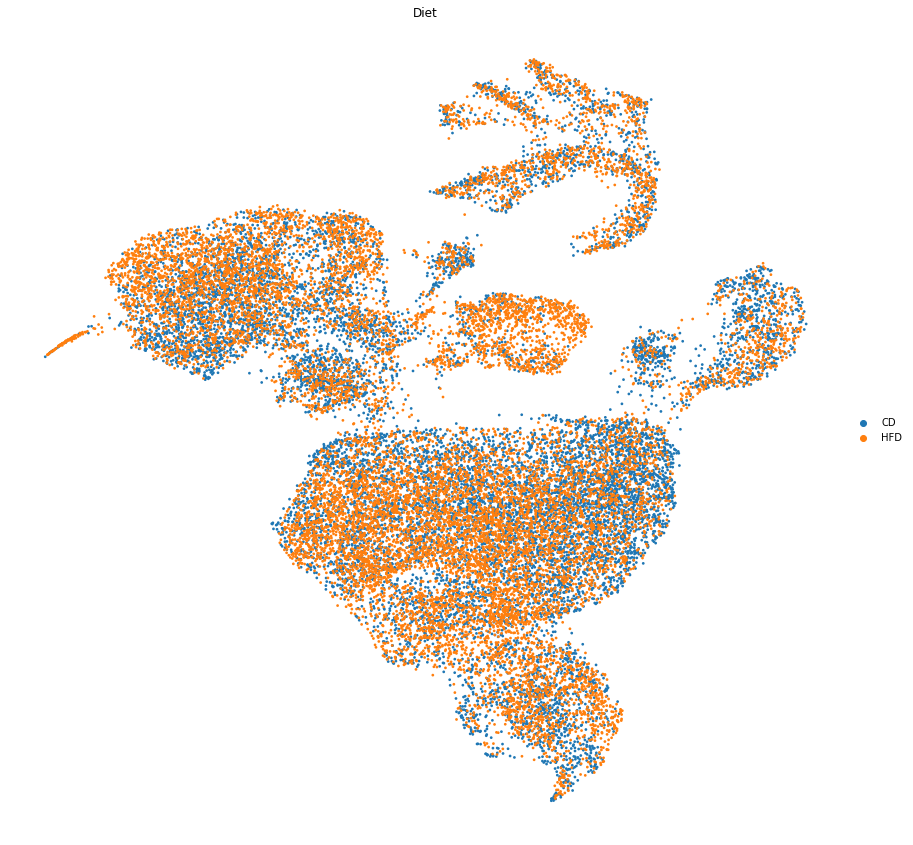

In [ ]:
# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(15, 15))  # Adjust the figsize values as needed

# Plot UMAP on the specified axis
sc.pl.umap(
    adata,
    color=["Diet"],
    frameon=False,
    size=30,
    ax=ax
)

# Show the plot
plt.show()